## Lecture 3
by Martin Hronec <br>
October 15th

### Table of contents

0. [IPython Magic](#magic)
1. [Numpy](#numpy)
2. [Pandas](#pandas)
3. [Matplotlib](#matplotlib)


<img src= "auxiliary/importing_code_from_giants.PNG" width= "400" height="200">
<center>Jake Vanderplas PyCon 2017</center>

In [1]:
# helping
?len

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method


In [2]:
# list of all IPython Magic
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

Useful IPython Magic commands. 

In [3]:
# Execute python code (from .py or .ipynb files)
%run auxiliary/not_so_helpful.ipynb

Coming from another notebook!


In [4]:
# replace the cell with an external script (better be Python, if you don't want to read JSON)
%load

UsageError: Missing filename, URL, input history range, macro, or element in the user namespace.


In [5]:
# share variables between different notebooks (more in docs)
var_to_share = ['Sharing is loving.']
%store var_to_share
del var_to_share

Stored 'var_to_share' (list)


In [6]:
# this could be done from different notebook 
%store

Stored variables and their in-db values:
var_to_share             -> ['Sharing is loving.']


In [7]:
# refresh all variables from store (!overwrites current variables)
%store -r
print(var_to_share)

['Sharing is loving.']


In [8]:
# list of global variables
%who

var_to_share	 


In [9]:
# executing shell comands from the jupyter notebook
!dir

 Volume in drive C is Windows
 Volume Serial Number is 4CCB-7B91

 Directory of C:\Users\Martin Hronec\Projects\phd\PythonDataIES\03

10/14/2019  09:24 PM    <DIR>          .
10/14/2019  09:24 PM    <DIR>          ..
10/14/2019  09:15 PM    <DIR>          .ipynb_checkpoints
10/14/2019  09:24 PM         1,269,831 03_NumpyPandasMatplotlib.ipynb
10/14/2019  09:18 PM    <DIR>          auxiliary
10/14/2019  09:12 PM    <DIR>          unzipped_data
               1 File(s)      1,269,831 bytes
               5 Dir(s)  59,424,382,976 bytes free


**Timing**
* `%%time` gives information about a single run of the code cell
* `%timeit` runs a code cell number of times and provides the mean of the fastest three times
* we will use these to show the speed of numpy

# Numpy <a name="numpy"></a>

* Num(erical) Py(thon)
* NumPy is at the base of Python's scientific stack of tools 
* Python already has *high-level number objects* (integers, floating point) and *containers*  (lists, dictionaries ) 
* np arrays contain only one type
* implements efficient operations on many items in a block of memory
* **ndarray** = block of memory + indexing scheme + data type descriptor
    * raw data 
    * how to locate an element
    * how to interpret an element
    
<img src= "https://scipy-lectures.org/_images/threefundamental.png" width= "300" height="200">

In [10]:
# np is alias ""(used when name of the packages are too long or coders are rightly lazy)
import numpy as np

In [11]:
# construct 3D array manually (focus on the brackets)
a = np.array([[[1,3], [2,4]], [[3,5], [4,6]]])
a.shape

(2, 2, 2)

Construct array like a civilized person.

In [12]:
# evenly spaced
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# evenly spaced
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
# number of points from an interval
start = 0
end = 1
n_points = 10
a = np.linspace(start, end, n_points)
a

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [15]:
# random seed is cell-specific! 
np.random.seed(1234)

# random (normal)
r = np.random.randn(4)
r

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 ])

### Indexing and Slicing
* In 2D, the first dimension corresponds to rows, the second to columns.
* in the multidimensional case, `a[0]` gives all elements in the unspecified dimension

In [16]:
# create toy diagonal matrix
a = np.diag([1,2,3,4])
a

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [17]:
print(a[0])
print(a[0,:])
print(a[0][0])
print(a[0,0])
print(a[:,1])

[1 0 0 0]
[1 0 0 0]
1
1
[0 2 0 0]


In [18]:
# select from start to an end with certain step (could be zero instead of missing)
a[:3:2,:3:2]

array([[1, 0],
       [0, 3]])

In [19]:
s = np.arange(100)
# step can also be negative
s[:50:-1]

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51])

**Copies vs. views**
* a slicing creates a **view** on the original array (just a way of accessing array data)
    * the original array is not copied in memory
* when modifying the view, the original array is modified as well! (SURPRISE, SURPRISE)
    * allows to save memory and time

In [20]:
a = np.arange(10)
a
b = a[::2]
b
print(np.may_share_memory(a, b))

True


In [21]:
b[0] = 12
print(b)
print(a)  # really? 

[12  2  4  6  8]
[12  1  2  3  4  5  6  7  8  9]


In [22]:
a = np.arange(10)
c = a[::2].copy()  # force a copy
c[0] = 12
print(c)
a

[12  2  4  6  8]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Speed of basic numpy operations**
   * much faster then in pure python

In [23]:
a = np.arange(10000)
%timeit a + 1  

14.5 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
l = range(10000)
%timeit [i+1 for i in l] 

1.49 ms ± 33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
# remember the difference between %time and %timeit


%time res = [i+1 for i in a]

Wall time: 3.98 ms


In [26]:
%time res =  a + 1 

Wall time: 0 ns


**Changing shape of an array**
* flattening
* reshaping (inverse of flattening)

In [27]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
# flattening
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [29]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [30]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

In [31]:
# reshaping
print(a.shape)
b = a.ravel()
b

(2, 3)


array([1, 2, 3, 4, 5, 6])

In [32]:
b.reshape(2,3)

array([[1, 2, 3],
       [4, 5, 6]])

**Pictures? Just pixels.**

In [33]:
# we will get to the matplotlib and pyplot in the last part of the lecture
import matplotlib.pyplot as plt
# another ipython magic
%matplotlib inline 

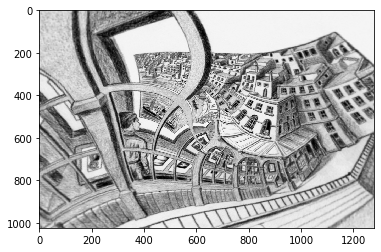

In [34]:
# for more M.C. Escher's pictures: https://www.mcescher.com/
img = plt.imread('auxiliary/mc_escher_print gallery.png')
plt.imshow(img, interpolation='nearest', aspect='auto')

In [35]:
# image shape as (H, W, D), depth: https://www.wikiwand.com/en/Color_depth
img.shape

(1024, 1280, 4)

In [36]:
# just an array!
img;

In [37]:
self_centered = img[200:,200:500]

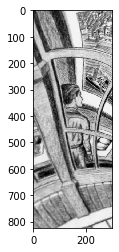

In [38]:
plt.imshow(self_centered)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


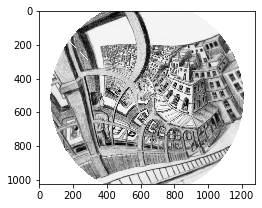

In [39]:
lx, ly, ld = img.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/4
img[mask] = 0
img[range(300), range(300)] = 255

plt.figure(figsize=(3, 3))
plt.axes([0, 0, 1, 1])
plt.imshow(img, cmap=plt.cm.gray)

# Pandas <a name="pandas"></a>

* Pan(el) Da(ta)
* go-to package for data analysis in Python
* designed for working with "labeled" (relational data)
* developed by Wes McKinney in 2008 while at AQR Capital Management out of the need for a tool to perform quantitative analysis on financial data (convinced AQR to open-source it)

* two primary data structures:
    * *Series* (1D labeled homogeneously-typed array)
    * *DataFrame* (2D labeled, tabular structure with potentially heterogeneously-typed column)
* more dimensions? MultiIndex.
* built on top of NumPy

In [40]:
import pandas as pd
import sys

In [41]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Pandas version 0.25.1


## Data structures in pandas

### Series
* 1D labeled array able to hold any data type (int,str,float, Python objects, etc.)

In [45]:
# the basic method to create a Series
data = [1,-1,1,-1]

# if no index is passed, one will be created having values [0, ..., len(data) - 1].
s = pd.Series(data)
s

0    1
1   -1
2    1
3   -1
dtype: int64

`data` (in the example above) can be:
    * a dict
    * a list
    * an ndarray
    * a scalar value


Examples of from dict and a scalar value below:

In [46]:
# in case of dictionary
d = {1:'a', 2:'b', 3:'c'}
pd.Series(d)

1    a
2    b
3    c
dtype: object

In [47]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

* a key difference between Series and ndarray: operations between Series automatically align the data based on label

In [48]:
a = pd.Series([1,-1,1,-1], index = [1,2,3,4])
b = pd.Series([-1,1,-1,1], index = [2,1,4,3])
a + b

1    2
2   -2
3    2
4   -2
dtype: int64

In [49]:
np.array(a) + np.array(b)

array([0, 0, 0, 0], dtype=int64)

* looping through (value-by-value) usually not necessary, remember the case of np array

In [50]:
np.exp(a)

1    2.718282
2    0.367879
3    2.718282
4    0.367879
dtype: float64

###  DataFrame

* a 2D labeled data structure with columns of potentially different types
* like a spreadsheet or SQL table, or a dict of Series objects
* the most frequently used pandas object 
* can be created:
    * dict of 1D ndarrays, lists, dicts, Series
    * 2D numpy.ndarray
    * a Series
    * another DataFrame

In [51]:
# from dict of Series
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


Before moving forward, let's look at how to get data into python using Pandas.

### Working with files and folders from Python

* `os` is a built-in modele

In [52]:
import os
os.getcwd()

'C:\\Users\\Martin Hronec\\Projects\\phd\\PythonDataIES\\03'

In [53]:
os.listdir('../data') # returns a list of all files and folders in a directory

['data_2010_ls.csv.zip',
 'data_2010_zs.csv.zip',
 'data_2011_ls.csv.zip',
 'data_2011_zs.csv.zip',
 'data_2012_ls.csv.zip',
 'data_2012_zs.csv.zip',
 'data_2013_ls.csv.zip',
 'data_2013_zs.csv.zip',
 'data_2014_ls.csv.zip',
 'data_2014_zs.csv.zip',
 'data_2015_ls.csv.zip',
 'data_2015_zs.csv.zip',
 'data_2016_ls.csv.zip',
 'data_2016_zs.csv.zip',
 'data_2017_ls.csv.zip',
 'data_2017_zs.csv.zip',
 'dotaznik2010_EN01.doc',
 'dotaznik2010_tisk.doc',
 'otazky_hodnoceni.txt']

In [54]:
for f in os.scandir('../data'): # returns an iterator of all the objects in directory (with attribute info)
    print(f.name)

data_2010_ls.csv.zip
data_2010_zs.csv.zip
data_2011_ls.csv.zip
data_2011_zs.csv.zip
data_2012_ls.csv.zip
data_2012_zs.csv.zip
data_2013_ls.csv.zip
data_2013_zs.csv.zip
data_2014_ls.csv.zip
data_2014_zs.csv.zip
data_2015_ls.csv.zip
data_2015_zs.csv.zip
data_2016_ls.csv.zip
data_2016_zs.csv.zip
data_2017_ls.csv.zip
data_2017_zs.csv.zip
dotaznik2010_EN01.doc
dotaznik2010_tisk.doc
otazky_hodnoceni.txt


In [55]:
# make directory
os.mkdir('temp_to_delete')

In [56]:
# delete directory
os.rmdir('temp_to_delete')

In [57]:
# prepare the folder for unzipped data
!mkdir unzipped_data

A subdirectory or file unzipped_data already exists.


In [58]:
# current working directory, we see we need to provide path to the data
# !pwd if on linux
!cd

C:\Users\Martin Hronec\Projects\phd\PythonDataIES\03


In [59]:
# we can see that original data are in individual zip-files, lets unzip them
import zipfile

# get all files in the data folder
data_files = os.listdir('../data')
data_surveys_only = [x for x in data_files if 'data' in x]

# define path to the folder with zipped files
path_to_data = r'../data/'

for file in data_surveys_only:
    with zipfile.ZipFile(path_to_data + file,"r") as zip_ref:
        zip_ref.extractall("unzipped_data")

! don't forget to add unzipped data to the .gitignore file

Now that we have our data unzipped, we can load them into Python, specifically using Pandas tools.

### Data I/O (in/out)
* CSV, JSON, HTML, Excel, HDF5, SQL, pickle, ...
    * for specific details, see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)
* `pd.read_csv()` is the workhorse for reading text files
    * large number of params means great flexibility when getting data in
    
We will work with the course evaluation data from FSV.
  * each observation is a response to the following questionare (... hope it reminds you of something)

In [60]:
from IPython.display import IFrame

# broken in Google Chrome ...
# IFrame("auxiliary/survey_questions_2010.pdf", width=600, height=400)

In [61]:
# load the "raw" data for one particular year
df = pd.read_csv('unzipped_data/data_2017_zs.csv',
            sep = ';', error_bad_lines=False )

b'Skipping line 279: expected 21 fields, saw 22\nSkipping line 4057: expected 21 fields, saw 22\n'


In [62]:
# if we don't assign it to the variable, it will just be printed out
pd.read_csv('unzipped_data/data_2017_zs.csv',
            sep = ';', error_bad_lines=False);

b'Skipping line 279: expected 21 fields, saw 22\nSkipping line 4057: expected 21 fields, saw 22\n'


In [63]:
print('Original columns: ', df.columns)
# raw data have column names in czech, let's rename them
# if you do not want to reassign, you can provide arg. "inplace = True"
df = df.rename(columns = {'cislo_dot' : 'number',
                    'kod_predm' : 'course_code',
                    'nazev_predm' : 'course_title',
                    'prednasejici' : 'teachers',
                    'cvicici' : 'seminar_leaders',
                    't1': 'c_value',
                    't2': 'c_improve', 
                    'katedra_code' : 'department_code'})

Original columns:  Index(['cislo_dot', 'kod_predm', 'nazev_predm', 'prednasejici', 'cvicici',
       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 't1', 't2', 'katedra_code'],
      dtype='object')


In [64]:
# look at the columns
df.columns

Index(['number', 'course_code', 'course_title', 'teachers', 'seminar_leaders',
       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 'c_value', 'c_improve', 'department_code'],
      dtype='object')

In [65]:
# iterative
df.index

RangeIndex(start=0, stop=6995, step=1)

In [66]:
# set column named "course_code" to be an index (or you can use "inplace" option again)
df =  df.set_index('course_code')

In [67]:
# look at the data but refrain from drawing the conclusions
df.head(5)

,number,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
course_code,,,,,,,,,,,,,,,,,,,,
JEB003,1,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N.","Fanta,N.,Kracík,J.,Švarcová,N.",3.0,5.0,4.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,NaN,2.0,NaN,NaN,ies
JLB003,2,Angličtina pro ekonomy I,NaN,"Poslušná,L.",5.0,3.0,NaN,NaN,NaN,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,NaN,NaN,cjp
NMMA701,3,Matematika 1,"Spurný,J.","Rondoš,J.",3.0,5.0,3.0,2.0,1.0,4.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,NaN,NaN,ies
JEB023,4,Úvod do studia práva,"Pražák,P.,Wintr,J.",NaN,3.0,4.0,3.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,2.0,3.0,2.0,NaN,NaN,ies
JEB055,5,Seminář k aktualitám I,NaN,"Vyhnánek,T.",2.0,3.0,NaN,NaN,NaN,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,ies


In [68]:
# make a copy of original data, so if you mess up, can go back to this
# not that smart when you are working with the large data
df_copy = df.copy(deep = True)

* `pd.DataFrame.copy()`:
    * deep: modifications to the data or indices of the copy will not be reflected in the original object
    * shallow: any changes to the data of the original will be reflected in the shallow copy (and vice versa)

In [69]:
# shape is an attribute not a function (attributes can be assigned to)
df.shape

(6995, 20)

In [70]:
# try to call it as a function
df.shape()

TypeError: 'tuple' object is not callable

In [ ]:
# classical data summarization
df.describe()

In [71]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6995 entries, JEB003 to JJM340
Data columns (total 20 columns):
number             6995 non-null int64
course_title       6995 non-null object
teachers           5434 non-null object
seminar_leaders    2588 non-null object
q1                 6847 non-null float64
q2                 6827 non-null float64
q3                 5458 non-null float64
q4                 5457 non-null float64
q5                 5458 non-null float64
q6                 2600 non-null float64
q7                 2600 non-null float64
q8                 2600 non-null float64
q9                 6776 non-null float64
q10                6829 non-null float64
q11                6783 non-null float64
q12                6801 non-null float64
q13                6798 non-null float64
c_value            2183 non-null object
c_improve          1798 non-null object
department_code    6995 non-null object
dtypes: float64(13), int64(1), object(6)
memory usage: 1.1+ MB


In [72]:
# memory usage of each column in bytes (useful when working with the larger datasets)
df.memory_usage()

Index              55960
number             55960
course_title       55960
teachers           55960
seminar_leaders    55960
q1                 55960
q2                 55960
q3                 55960
q4                 55960
q5                 55960
q6                 55960
q7                 55960
q8                 55960
q9                 55960
q10                55960
q11                55960
q12                55960
q13                55960
c_value            55960
c_improve          55960
department_code    55960
dtype: int64

* you can treat a DataFrame semantically like a dict of like-indexed Series objects
    * getting, setting, and deleting columns works with the same syntax as the analogous dict operations

## Indexing/Selection

| Operation                      | Syntax        |  Result   |
|--------------------------------|---------------|-----------|
| Select column                  | df[col]       |  Series   |
| Select row by label            | df.loc[label] |  Series   |
| Select row by integer location | df.iloc[loc]  |  Series   |
| Slice rows                     | df[5:10]      | DataFrame |
| Select rows by boolean vector  | df[bool_vec]  | DataFrame |

In [73]:
# gives us series
type(df['course_title'])

pandas.core.series.Series

In [74]:
# gives us dataframe
type(df[['course_title']])

pandas.core.frame.DataFrame

In [75]:
# just one column: just convenience (if column name has a space or dot, you are screwed)
df.course_title;

In [76]:
# list of columns you want 
df[['course_title','teachers']].head(5)

,course_title,teachers
course_code,,
JEB003,Ekonomie I,"Fanta,N.,Kracík,J.,Švarcová,N."
JLB003,Angličtina pro ekonomy I,NaN
NMMA701,Matematika 1,"Spurný,J."
JEB023,Úvod do studia práva,"Pražák,P.,Wintr,J."
JEB055,Seminář k aktualitám I,NaN


In [77]:
# list of all columns 
df.columns

Index(['number', 'course_title', 'teachers', 'seminar_leaders', 'q1', 'q2',
       'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13',
       'c_value', 'c_improve', 'department_code'],
      dtype='object')

In [78]:
# adding columns (first adding, so we have something to drop)
df['Lenka'] = '11/10'
# you can also use assign function, if new column should be a function of original column 

In [79]:
# drop column (you can also use 'del' (a general python comand for deleting)
df.drop('Lenka', axis = 1, inplace = True) # axis to specify you want to drop column, inplace operation in this case

In [80]:
# show all attributes of an object
dir(df);

### loc and Idioms
* `.loc` selects data by the label of the rows and columns (as opposed to the `.iloc`)
* we can also use `.loc` for subsetting based on condition(s)

In [81]:
# select only observations for IES only
df_ies = df.loc[df['department_code'] == 'ies']

In [82]:
# select only observations for Advanced Econometrics
df.loc[df['course_title'] == 'Advanced Econometrics'].head(2)

,number,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
course_code,,,,,,,,,,,,,,,,,,,,
JEM005,89,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,Mr.Barunik is very sexy,NaN,ies
JEM005,973,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",4.0,4.0,5.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,5.0,4.0,4.0,NaN,NaN,ies


In [83]:

# subsetting based on multiple conditions: AE and non-missing comment on what to improve
df.loc[(df['course_title'] == 'Advanced Econometrics') & (~df['c_improve'].isnull())].head(2)

,number,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
course_code,,,,,,,,,,,,,,,,,,,,
JEM005,1138,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",NaN,5.0,4.0,4.0,4.0,3.0,3.0,3.0,NaN,2.0,5.0,5.0,5.0,The lecturers teaching method.,More practical exercises and involvement of st...,ies
JEM005,1870,Advanced Econometrics,"Baruník,J.,Hronec,M.,Kraicová,L.,Kurka,J.,Nevr...","Hronec,M.,Kraicová,L.,Kurka,J.,Nevrla,M.",3.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,Positive atmosphere the lecturer provided,It was too theoretical and abstract. Since it ...,ies


In [84]:
# conditions inside are just series of booleans (could be lists, arrays, etc.)
print((df['course_title'] == 'Advanced Econometrics').head(5))
(~df['c_improve'].isnull()).head(5)

course_code
JEB003     False
JLB003     False
NMMA701    False
JEB023     False
JEB055     False
Name: course_title, dtype: bool


course_code
JEB003     False
JLB003     False
NMMA701    False
JEB023     False
JEB055     False
Name: c_improve, dtype: bool

In [85]:
mask = df['course_title'] == 'Advanced Econometrics'

In [86]:
#subset using mask 
df.where(mask, 'REPLACEMENT').head()

,number,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code
course_code,,,,,,,,,,,,,,,,,,,,
JEB003,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT
JLB003,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT
NMMA701,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT
JEB023,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT
JEB055,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT,REPLACEMENT


* Sometimes, we don't have a clear list of columns to be selected ready, e.g. how to select columns from q1 to q13? 
    * using `.iloc`
    * using actual list of column names :(
        * be lazy!
    * or ... 

In [87]:
# list comprehention
print([x for x in df.columns if 'q' in x])
print([x for x in df.columns if (len(x) == 2) | (len(x) == 3)])

['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']
['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']


In [88]:
q_columns = [x for x in df.columns if 'q' in x]
df_q = df[q_columns]

### Using functions on pandas objects

| Operation          | Function              |
|--------------------|-----------------------|
| Tablewise          | `pipe()`              |
| Row or Column-wise | `apply()`             |
| Aggregation        | `agg() / transform()` |
| Elementwise        | `applymap()`          |

**Tablewise**
* DFs and Series can be arguments of the functions
* if multiple functions need to be called in a sequence, use `pipe()` method, also called the method chaining
    * often used in the data science setting
    * inspired by unix pipes and dplyr (%>%) operator in R 

In [89]:
# prepare some toy dataframe
import statsmodels.formula.api as sm
x = np.linspace(-10,10,100)
y = x**2
ols_data = pd.DataFrame({'x': x, 'y': y})

In [90]:
# method chaining way, with pipe(function, arguments)
(ols_data.pipe((sm.ols, 'data'), 'y ~ x')
 .fit()
 .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                -1.542e-14
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               1.00
Time:                        21:26:53   Log-Likelihood:                -483.38
No. Observations:                 100   AIC:                             970.8
Df Residuals:                      98   BIC:                             976.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0067      3.072     11.070      0.000      27.910      40.103
x          -1.665e-16      0.527  -3.16e-16      1.000      -1.045       1.045
==============================================================================
Omnibus:                       14.290   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.864
Skew:                           0.638   Prob(JB):                      0.00721
Kurtosis:                       2.140   Cond. No.                         5.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Row or Column-wise Function Application**
* `apply()` is extremely powerful, when used with some brainpower

In [91]:
df_q.apply(np.mean, axis = 0)

q1     4.108661
q2     3.284166
q3     4.214731
q4     4.359355
q5     3.872664
q6     4.288462
q7     4.494231
q8     4.151923
q9     1.419126
q10    4.020940
q11    3.574672
q12    3.896927
q13    4.127390
dtype: float64

In [92]:
# using lambda
df_q.apply(lambda x: (x - np.mean(x)) / np.std(x), axis = 0);

In [93]:
# using custom function, with arguments (could have also be done with lambda)
def add_and_substract(df, sub = 1, add = 1):
    return df - sub + add
df_q.apply(add_and_substract, args = (0,0));

In [94]:
# A little bit more sophisticated:  e.g. get index of the observation with the longest value comment
df['c_value'].apply(lambda x: len(str(x))).idxmax()

'JEB110'

**Aggregation**
* *`aggregate()`* and *`transform()`*
* aggregation allows multiple aggregation operations in a single concise way
* `transform()` method returns an object that is indexed the same as the original
   * allows multiple operations at the same time, instead of one-by-one as `aggregate()` method

In [95]:
# aggregating simple function is the same as apply
df_q.agg(np.mean, axis = 0)

q1     4.108661
q2     3.284166
q3     4.214731
q4     4.359355
q5     3.872664
q6     4.288462
q7     4.494231
q8     4.151923
q9     1.419126
q10    4.020940
q11    3.574672
q12    3.896927
q13    4.127390
dtype: float64

In [96]:
# aggregating more functions more interesting (you could do your own describe function easily! )
df_q.aggregate([np.mean, np.std, np.min, np.max], axis = 0)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
mean,4.108661,3.284166,4.214731,4.359355,3.872664,4.288462,4.494231,4.151923,1.419126,4.020940,3.574672,3.896927,4.12739
std,1.019755,1.056333,1.032399,0.999295,1.267321,0.964880,0.887239,1.142584,0.775423,1.069084,1.274129,1.115977,1.12351
amin,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
amax,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [97]:
# aggregating using dictionary, i.e. column specific aggregation
df_q.agg({'q1' : [np.mean], 'q2': np.std, 'q3': np.var})

,q1,q2,q3
mean,4.108661,NaN,NaN
std,NaN,1.056333,NaN
var,NaN,NaN,1.065849


In [98]:
# using single function, the same as with apply
df_q.transform(lambda x: np.power(x,2));

In [99]:
# using multiple functions (can also be done using dictionary as in the case of aggregate)
df_q.transform([np.abs, lambda x: x + 1]);

**Elementwise**
* `applymap()`
* not all functions can be vectorized ... 

In [100]:
# some function
def l(x):
    return len(str(x))

# for series
df['c_value'].map(l);
# for dataframe
df[['c_value', 'c_improve']].applymap(l);

## Missing values

In [101]:
# % of missing observations for specific column
df['q5'].isnull().sum() / df['q1'].isnull().count()

0.21972837741243745

In [102]:
# replacing missing values
df['q1'].fillna(-99);

## Multi-index
* a MultiIndex DataFrame dimensional data

* let's load all the data
* put them together, so we can see dynamics over time
    * problem: once data are loaded into Python, we have no indicator of year and semester data correspond to

In [103]:
# prepare empty dataframe that will be populated file-by-file
df_all = pd.DataFrame()

# columns will be czech, so let's rename them
columns_translation = {'cislo_dot' : 'number',
                    'kod_predm' : 'course_code',
                    'nazev_predm' : 'course_title',
                    'prednasejici' : 'teachers',
                    'cvicici' : 'seminar_leaders',
                    't1': 'c_value',
                    't2': 'c_improve', 
                    'katedra_code' : 'department_code'}

# data really start only in later years
for d in os.listdir('unzipped_data/')[8:]:
    try:
        year, semester = d.split('_')[1], d.split('_')[2][:2]
        df_temp = pd.read_csv('unzipped_data/' + d, sep = ';',
                              header = 0, error_bad_lines=False)
        df_temp = df_temp.rename(columns = columns_translation)
        df_temp.dropna(how = 'all', inplace = True, axis = 1)
        df_temp['year'] = int(year)
        df_temp['semester'] = semester
        df_all = df_all.reindex(df_temp.columns, axis = 1)
        df_all = df_all.append(df_temp)
        
    except:
        print(d + ' has name not in the expected format.')
        pass        

b'Skipping line 1017: expected 21 fields, saw 22\nSkipping line 2087: expected 21 fields, saw 22\nSkipping line 2447: expected 21 fields, saw 22\nSkipping line 2736: expected 21 fields, saw 22\nSkipping line 2828: expected 21 fields, saw 23\nSkipping line 3461: expected 21 fields, saw 24\nSkipping line 3645: expected 21 fields, saw 24\nSkipping line 4490: expected 21 fields, saw 23\n'
b'Skipping line 1816: expected 21 fields, saw 22\nSkipping line 1877: expected 21 fields, saw 22\nSkipping line 3253: expected 21 fields, saw 24\nSkipping line 3270: expected 21 fields, saw 22\nSkipping line 3329: expected 21 fields, saw 22\n'
b'Skipping line 7136: expected 21 fields, saw 23\n'
b'Skipping line 4890: expected 21 fields, saw 22\nSkipping line 8304: expected 21 fields, saw 22\nSkipping line 8358: expected 21 fields, saw 22\n'
b'Skipping line 1145: expected 21 fields, saw 22\nSkipping line 1512: expected 21 fields, saw 22\n'
b'Skipping line 279: expected 21 fields, saw 22\nSkipping line 4057:

In [104]:
# keep only IES
df_all = df_all[df_all['department_code'] == 'ies']

**Working with multi-indices**

* also known as "hierarchical indexing"
* allows representation of higher-dimensional data in 2D DataFrames (even Series)
* each extra level in a multi-index represents an extra dimension of data

In [105]:
# look at methods of this object
?pd.MultiIndex

Init signature:
pd.MultiIndex(
    levels=None,
    codes=None,
    sortorder=None,
    names=None,
    dtype=None,
    copy=False,
    name=None,
    verify_integrity=True,
    _set_identity=True,
)
Docstring:     
A multi-level, or hierarchical, index object for pandas objects.

Parameters
----------
levels : sequence of arrays
    The unique labels for each level.
codes : sequence of arrays
    Integers for each level designating which label at each location.

    .. versionadded:: 0.24.0
labels : sequence of arrays
    Integers for each level designating which label at each location.

    .. deprecated:: 0.24.0
        Use ``codes`` instead
sortorder : optional int
    Level of sortedness (must be lexicographically sorted by that
    level).
names : optional sequence of objects
    Names for each of the index levels. (name is accepted for compat).
copy : bool, default False
    Copy the meta-data.
verify_integrity : bool, default True
    Check that the levels/codes are consistent 

In [106]:
# easiest way to create multiindex, is just pass multiple columns into set_index() function 
df_all.set_index(['number','course_code', 'year'], inplace = True)

In [107]:
# index cols have names, can be changed
print(df_all.index.names)
# number of levels in the index
df_all.index.nlevels

['number', 'course_code', 'year']


3

In [108]:
df_all.head()

,,,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,semester
number,course_code,year,,,,,,,,,,,,,,,,,,,,
2.0,JEB111,2014.0,Advanced Data Analysis in MS Excel,NaN,"Kraicová,L.,Polák,P.",5.0,4.0,NaN,NaN,NaN,5.0,5.0,4.0,1.0,5.0,5.0,4.0,5.0,NaN,NaN,ies,ls
3.0,JEB001,2014.0,Bachelor´s Thesis Seminar I,NaN,"Cahlík,T.,Cotte,P.",5.0,2.0,NaN,NaN,NaN,3.0,2.0,3.0,3.0,3.0,1.0,1.0,5.0,Zajímavý hosté a zajímavá témata,NaN,ies,ls
6.0,JEB135,2014.0,Economics of Global Business,"Semerák,V.",NaN,5.0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,1.0,5.0,5.0,5.0,5.0,NaN,NaN,ies,ls
13.0,JEB117,2014.0,Mathematics for Economists,"Abramishvili,Z.",NaN,4.0,3.0,3.0,4.0,4.0,NaN,NaN,NaN,1.0,4.0,4.0,4.0,4.0,NaN,NaN,ies,ls
20.0,JEB132,2014.0,Introductory Statistics,"Červinka,M.",NaN,5.0,4.0,5.0,3.0,4.0,NaN,NaN,NaN,1.0,5.0,4.0,3.0,5.0,NaN,NaN,ies,ls


In [109]:
# reseting index, focus on parameters
df_all.reset_index(level = 'number',drop = False, inplace = False).head()

,,number,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,...,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,semester
course_code,year,,,,,,,,,,,,,,,,,,,,,
JEB111,2014.0,2.0,Advanced Data Analysis in MS Excel,NaN,"Kraicová,L.,Polák,P.",5.0,4.0,NaN,NaN,NaN,5.0,...,4.0,1.0,5.0,5.0,4.0,5.0,NaN,NaN,ies,ls
JEB001,2014.0,3.0,Bachelor´s Thesis Seminar I,NaN,"Cahlík,T.,Cotte,P.",5.0,2.0,NaN,NaN,NaN,3.0,...,3.0,3.0,3.0,1.0,1.0,5.0,Zajímavý hosté a zajímavá témata,NaN,ies,ls
JEB135,2014.0,6.0,Economics of Global Business,"Semerák,V.",NaN,5.0,4.0,5.0,5.0,5.0,NaN,...,NaN,1.0,5.0,5.0,5.0,5.0,NaN,NaN,ies,ls
JEB117,2014.0,13.0,Mathematics for Economists,"Abramishvili,Z.",NaN,4.0,3.0,3.0,4.0,4.0,NaN,...,NaN,1.0,4.0,4.0,4.0,4.0,NaN,NaN,ies,ls
JEB132,2014.0,20.0,Introductory Statistics,"Červinka,M.",NaN,5.0,4.0,5.0,3.0,4.0,NaN,...,NaN,1.0,5.0,4.0,3.0,5.0,NaN,NaN,ies,ls


In [110]:
df_all.head(2)

,,,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,semester
number,course_code,year,,,,,,,,,,,,,,,,,,,,
2.0,JEB111,2014.0,Advanced Data Analysis in MS Excel,NaN,"Kraicová,L.,Polák,P.",5.0,4.0,NaN,NaN,NaN,5.0,5.0,4.0,1.0,5.0,5.0,4.0,5.0,NaN,NaN,ies,ls
3.0,JEB001,2014.0,Bachelor´s Thesis Seminar I,NaN,"Cahlík,T.,Cotte,P.",5.0,2.0,NaN,NaN,NaN,3.0,2.0,3.0,3.0,3.0,1.0,1.0,5.0,Zajímavý hosté a zajímavá témata,NaN,ies,ls


In [111]:
# sort index, necessary if we want to slice in indexing
df_all = df_all.sort_index(axis=0)

In [112]:
# get all responses from year 2014 to 2017 and for advanced econometrics
idx = pd.IndexSlice
df_all.loc[idx[:,'JEM005', 2014:2017],:];

In [113]:
# alternative (shown in the DC)
df_all.loc[(slice(None), 'JEM005',slice(2014, 2017)), :].head(2)

,,,course_title,teachers,seminar_leaders,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,c_value,c_improve,department_code,semester
number,course_code,year,,,,,,,,,,,,,,,,,,,,
76.0,JEM005,2015.0,Advanced Econometrics,"Baruník,J.",NaN,4.0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,1.0,4.0,4.0,5.0,5.0,"Výborný pan Baruník a jeho přednášky, dobrá cv...",První úkol od pana Křehlíka byl nepřiměřeně te...,ies,zs
77.0,JEM005,2015.0,Advanced Econometrics,NaN,"Baruník,J.",NaN,NaN,NaN,NaN,NaN,4.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ies,zs


In [114]:
# create mask for catching containing my name 
hronec_mask = df_all['c_improve'].str.contains('Hronec').fillna(False)

# feedback by future journalist :)
df_all.loc[hronec_mask]['c_improve'].values

array(['Very badly managed course. Lectures and seminars were very random throughout the semester, every week in different day and time. We learned results of midterm and home assignment after almost one month. But worst of all - Hronec. Way too fast and way too arrogant - \\This exercise is beneath my intelligence, but you will do it at home, because it may be in the exam\\", and so he skipped half of the exercises on seminars, because they were \\"too easy\\", no really not easy sir ... Hronec out !!!"'],
      dtype=object)

Everything we've not managed to cover today will be covered during the next lecture with pandas, and more:

* time-series
* merge, concat, join
* groupby (prety scalable)
* reshaping (Hierarchical Indexing and Reshaping)
* pivot tables

## Matplotlib <a name="introduction"></a>

* "A picture is worth a thousand words."
    * more like "A picture is worth a few lines of code."
* development started in 2003 by John D. Hunter, a neurobiologist (inspired by MATLAB software)
* generating basic plots in *matplotlib* is simple, mastering the library can be little bit less pleseant (we skip this part)
* you can have as much control as you want, but you can also concede as much control as you want 
* [**gallery**](https://matplotlib.org/gallery/index.html)
    * can get help to problems like "I want to make a figure that looks something I've seen somewhere." (hard to google)
* plotting consists of many layers, from general 'contour this 2D array' to very specific 'color this screen pixel'
    * key is allowing both levels to coexist in one package
* *matplotlib* has 2 interfaces:
    1. "state-machine environment" (based on MATLAB)
    2. a object-oriented interface (we will cover object-oriented paradigm (in general) during the next lecture)
* this often creates confusion (multiple, conflicting, solutions on the web)
* another common confusion is the relationship of *Matplotlib, pyplot and pylab*
    * Matplotlib is the whole package
    * `matplotlib.pyplot` is a module in matplotlib
    * `pylab` is a a convenience module doing a bulk import of `pyplot` and `numpy`

* [anatomy of the plot](https://matplotlib.org/examples/showcase/anatomy.html) from matplotlib

<img src= "https://matplotlib.org/_images/anatomy.png" width= "600" height="400">

* the *figure* keeps track of all the child *Axes*, titles,legends, etc.
    * the figure can have any number of *Axes*
* *Axes* is 'a plot', i.e. the region of the image with the data space
    * given *Axes* object can only be in one Figure
    * *Axes* contains 2 (3 in case of 3D) *Axis* objects which take care of the data limits (conrolled via `set_xlim()` method)
    * each *Axes* has a title (`set_title()`), an x- and y-labels (`set_xlabel()`)
* *Artist* is anything you can see on the figure, e.g. text objects, Line2D objects, etc.

* `matplolib.pyplot` functions make some changes to a figure, e.g. create a figure, plot some lines, etc.
    * the plotting functions are directed to the current axes

* all of plotting functions expect `np.array` or `array-like` data objects (for majority of cases works out of the box)

In [116]:
# available styles for rendering plots 
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [117]:
# increasing the size of the figure
plt.figure(figsize = (20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

bmh


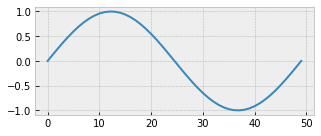

classic


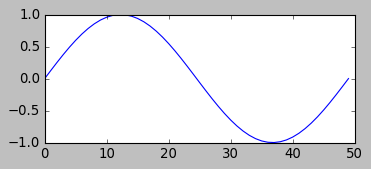

dark_background


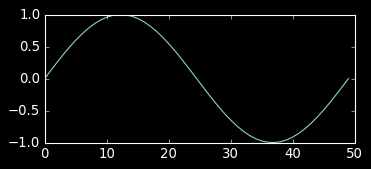

fast


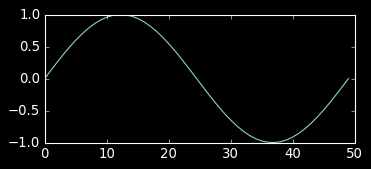

fivethirtyeight


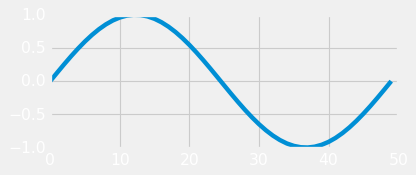

ggplot


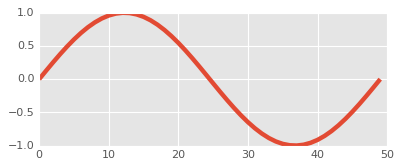

grayscale


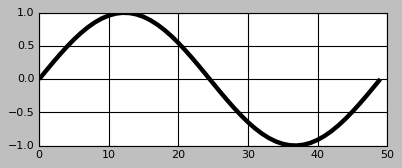

seaborn-bright


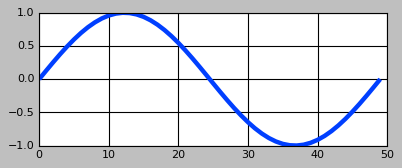

seaborn-colorblind


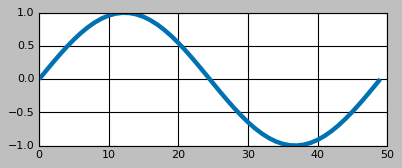

seaborn-dark-palette


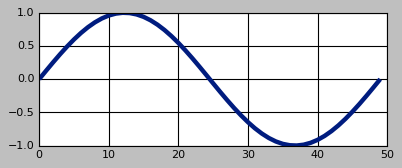

seaborn-dark


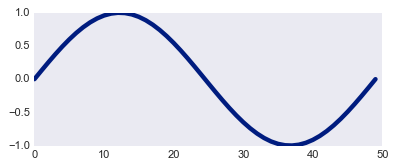

seaborn-darkgrid


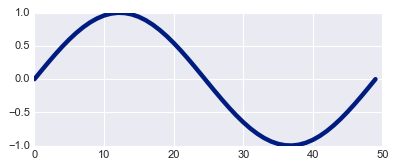

seaborn-deep


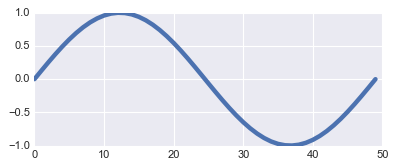

seaborn-muted


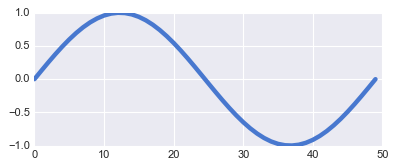

seaborn-notebook


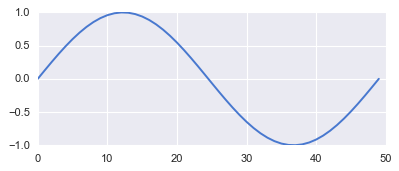

seaborn-paper


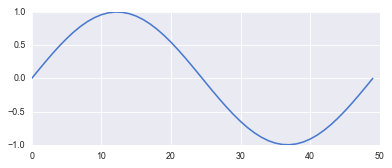

seaborn-pastel


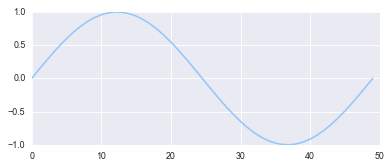

seaborn-poster


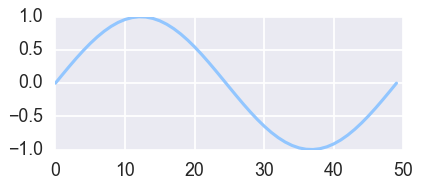

seaborn-talk


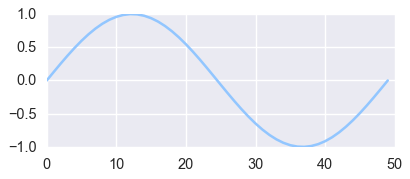

seaborn-ticks


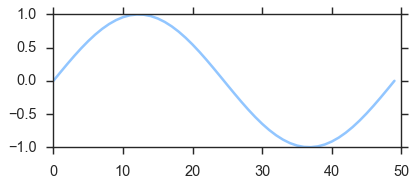

seaborn-white


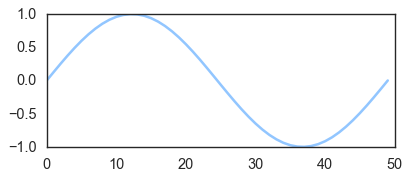

seaborn-whitegrid


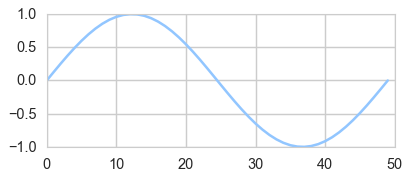

seaborn


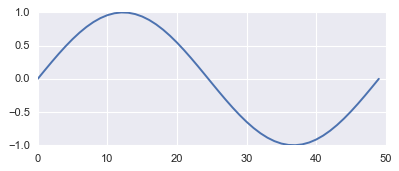

Solarize_Light2


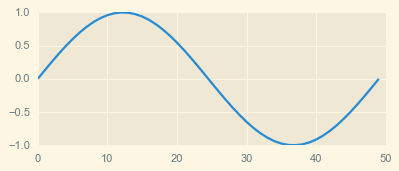

tableau-colorblind10


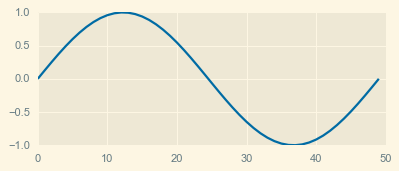

_classic_test


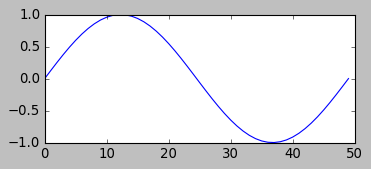

In [118]:
from time import sleep
for style in plt.style.available:
    plt.style.use(style)
    print(style)
    plt.figure(figsize=(5,2))
    plt.plot(np.sin(np.linspace(0,2*np.pi)))
    plt.show()
    sleep(1)

In [125]:
plt.style.use('ggplot')

In [126]:
# example of object-oriented interface
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure') # Add a title so we know which it is

Text(0.5, 0.98, 'No axes on this figure')

<Figure size 640x480 with 0 Axes>

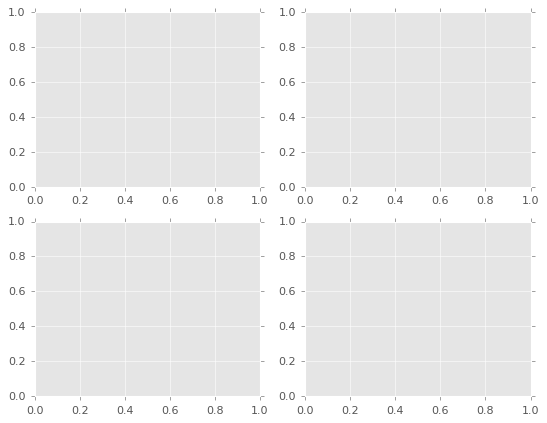

In [127]:
# a figure with a 2x2 grid of Axes
fig, ax_lst = plt.subplots(2, 2)

### Min. example of pyplot

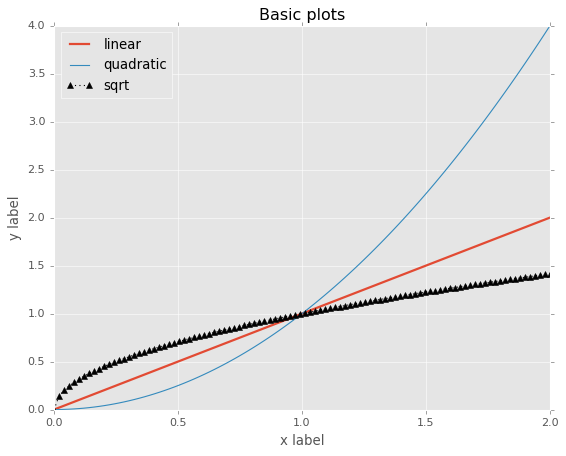

In [128]:
# minimum example of pyplot
x = np.linspace(0, 2, 100)

# we can also specify only "y" and use default x-axis: plt.plot(x, label='linear')
plt.plot(x, x, label='linear',  linewidth=2.0)
plt.plot(x, x**2, label='quadratic')
plt.plot(x, np.sqrt(x),'k^:',label='sqrt')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Basic plots")

plt.legend(loc = 'best');

### Sub-plots

* for multiple subplots: `fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))`
* call `plt.subplot()` and specify three numbers:
    * number of rows
    * number of columns
    * subplot number you want to activate.
* if subplots are too squished `plt.tight_layout()`

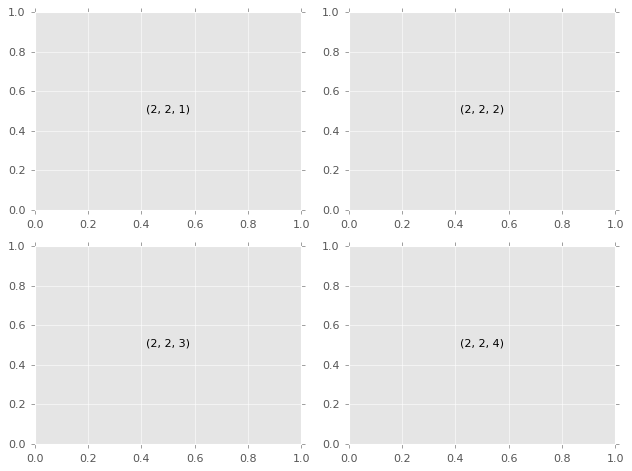

In [129]:
for i in range (1, 5):
    plt.subplot(2, 2, i)
    plt.text(0.5,0.5, str((2, 2, i)), ha='center', fontsize = 10)
    plt.tight_layout()
    plt.grid(True) # add the grid

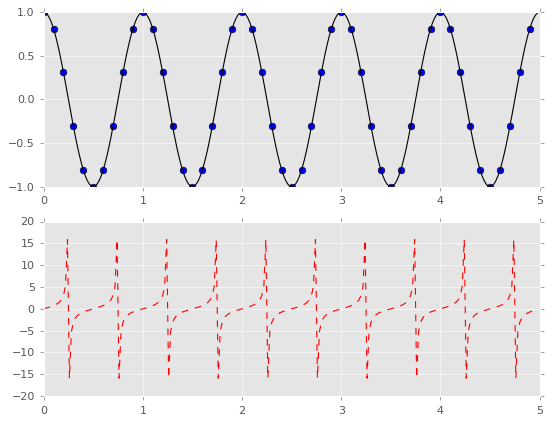

In [132]:
# for multiple figures and axes 
def f(x):
    return np.cos(2*np.pi*x)

x1 = np.arange(0.0, 5.0, 0.1)
x2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1) # optional, since figure(1) will be created by default
plt.subplot(211)
plt.plot(x1, f(x1), 'bo', x2, f(x2), 'k')

plt.subplot(212)
plt.plot(x2, np.tan(2*np.pi*x2), 'r--')

### If picture is not worth a thousand words.

Working with text.

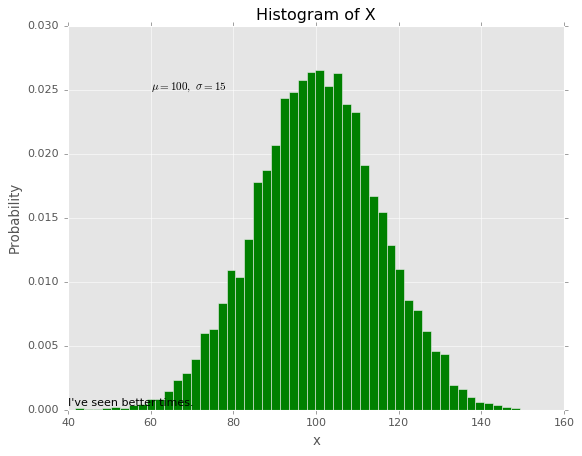

In [133]:
mu, sigma, n = 100, 15, 10000
x = np.random.normal(mu, sigma, n)

# the histogram of the data
plt.hist(x, bins = 50, density= True, facecolor='g')

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram of X')

# meaningful text
plt.text(60, .025, f'$\mu={mu},\ \sigma={sigma}$')
# tail events text
plt.text(40, .00025, f"I've seen better times.")

plt.grid(True)

### Annotation

(-2, 2)

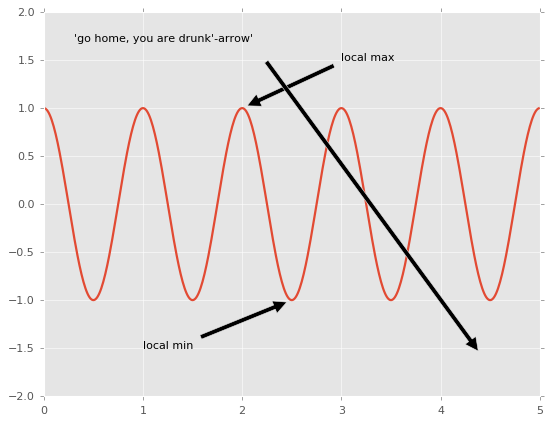

In [134]:
# annotating text
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.annotate('local min', xy=(2.5, -1), xytext=(1, -1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.annotate("'go home, you are drunk'-arrow'", xy=(4.5, -1.7), xytext=(0.3, 1.7),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.ylim(-2, 2)

### Text (all in one)

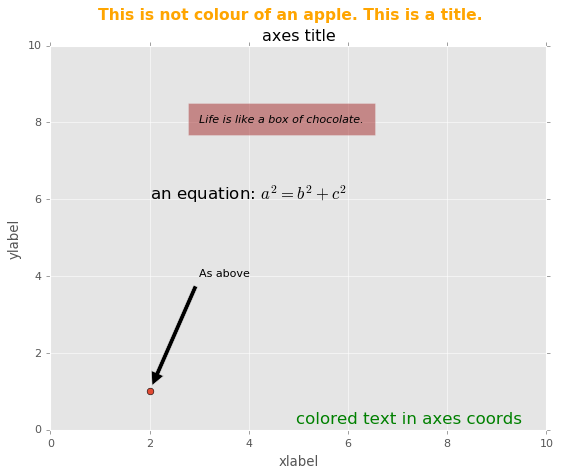

In [135]:
# initiate figure
fig = plt.figure()
fig.suptitle('This is not colour of an apple. This is a title.', fontsize=14, fontweight='bold', color = 'orange')

ax = fig.add_subplot(111)
# fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'Life is like a box of chocolate.', style='italic',
        bbox={'facecolor': 'brown', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $a^2 = b^2 + c^2$', fontsize=15)

ax.text(3, 2, '')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('As above', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

* if we have to make the same plots over and over again (with different data hopefully :D), write specialized functions to do the plotting
* The recommended function signature is below:

In [136]:
def plotting_function_template(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

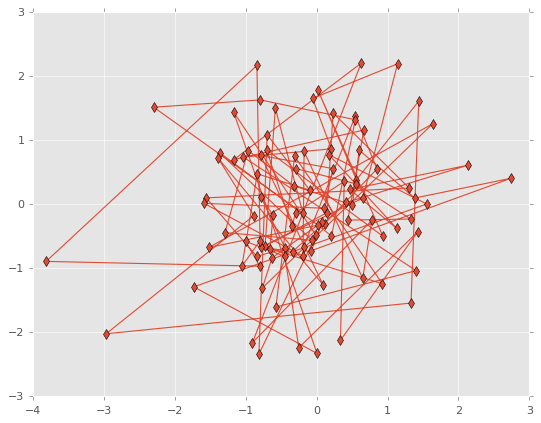

In [137]:
# which you would then use as:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
plotting_function_template(ax, data1, data2, {'marker': 'd'})

* pandas plotting methods are really just convenient wrappers around existing matplotlib calls
    * `plot()` method on pandas Series and DataFrame is a wrapper around plt.plot()
* if you want both quickness of pandas `plot` function as well as access to the more powerful functionality of *matplotlib*
    * add `fig, ax = plt.subplots()` to your plots
* resulting plot will look the same, but we will have an access to the axis and figures for future customization

### Saving plots

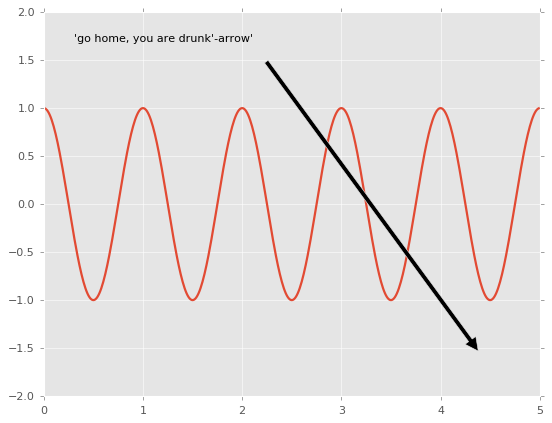

In [139]:
ax = plt.subplot(111)
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
plt.annotate("'go home, you are drunk'-arrow'", xy=(4.5, -1.7), xytext=(0.3, 1.7),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.ylim(-2, 2)

# actually saving
plt.savefig('auxiliary/go_home_you_drunk.png')